In [60]:
import os
import pandas as pd
import pickle

In [61]:
colPickle = open("./cols.pkl","rb")
importantColumns = pickle.load(colPickle)
importantColumns = importantColumns[2:]

In [62]:
Phone1Files = []
Phone2Files = []
NameMapping = dict()
for root, dirs, files in os.walk("./data"):
    for name in files:
        fpath = os.path.join(root, name)
        if name.find("Phone_1") != -1:
            Phone1Files.append(fpath)
        else:
            Phone2Files.append(fpath)

In [63]:
for i in range(len(Phone1Files)):
    phone1df = pd.read_csv(Phone1Files[i])
    phone1df.drop(phone1df.tail(8).index, inplace=True) #Removing aggregate Statistics
    phone1df = phone1df.filter(["TIME_STAMP", "Event Technology","5G KPI PCell RF Frequency [MHz]","LTE KPI PCell Serving EARFCN(DL)","Experiment","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"])
    phone1df["TIME_STAMP"] = pd.to_datetime(phone1df["TIME_STAMP"])
    phone1df = phone1df.sort_values("TIME_STAMP")
    phone1df["Experiment"] = 0
    phone1df['Experiment'] = (phone1df['TIME_STAMP']
                    .transform(lambda x: x.diff().gt('1Sec').cumsum())
                    )
    if phone1df["Experiment"].max() == 29:
        phone1df[phone1df["Experiment"] < 5].to_csv('Phone1Static.csv', mode = 'a',header=not os.path.exists('Phone1Static.csv'))
        phone1df[(phone1df["Experiment"] >= 5) & (phone1df["Experiment"] < 10)].to_csv('Phone1Away.csv', mode = 'a',header=not os.path.exists('Phone1Away.csv'))
        phone1df[(phone1df["Experiment"] >= 10) & (phone1df["Experiment"] < 15)].to_csv('Phone1Ping.csv', mode = 'a',header=not os.path.exists('Phone1Ping.csv'))
        phone1df[phone1df["Experiment"] == 29].to_csv('Phone1PingMobility.csv', mode = 'a',header=not os.path.exists('Phone1PingMobility.csv'))
        phone1df[(phone1df["Experiment"] == 26) | (phone1df["Experiment"] == 25)].to_csv('Phone1Mobility.csv', mode = 'a',header=not os.path.exists('Phone1Mobility.csv'))
        # phone1df.to_csv('phone1.csv', mode='a')


/tmp/ipykernel_223814/2230634390.py:2: DtypeWarning: Columns (186,189,190,197,223,236) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_223814/2230634390.py:2: DtypeWarning: Columns (186,189,190,197,223,236,240,243,244,251,276,280,283,284,291,314,317,318,325,338,351,355,358,359,366,388) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_223814/2230634390.py:2: DtypeWarning: Columns (29,30,31,100,104,144,145,146,186,189,190,197,223,236,241,248,263,270,285,292,307,314,329) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_223814/2230634390.py:2: DtypeWarning: Columns (186,189,190,197,223,236) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
/tmp/ipykernel_223814/2230634390.py:2: DtypeWar

In [64]:
for i in range(len(Phone2Files)):
    phone2df = pd.read_csv(Phone2Files[i])
    phone2df.drop(phone2df.tail(8).index, inplace=True) #Removing aggregate Statistics
    phone2df = phone2df.filter(importantColumns)
    phone2df["TIME_STAMP"] = pd.to_datetime(phone2df["TIME_STAMP"])
    phone2df = phone2df.sort_values("TIME_STAMP")
    phone2df["Experiment"] = 0
    phone2df['Experiment'] = (phone2df['TIME_STAMP']
                    .transform(lambda x: x.diff().gt('1Sec').cumsum() + 30)
                    )
    if phone2df["Experiment"].max() == 41:
        phone2df.to_csv('phone2.csv', mode='a')

/tmp/ipykernel_223814/1344981687.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
/tmp/ipykernel_223814/1344981687.py:2: DtypeWarning: Columns (29,30,31,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])


KeyboardInterrupt: 

In [111]:
def GenerateGraph(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk[pd.to_numeric(chunk["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], errors="coerce") > 0] for chunk in iter_csv])
    df = df[["TIME_STAMP", "Event Technology","5G KPI PCell RF Frequency [MHz]","LTE KPI PCell Serving EARFCN(DL)"]]
    df['Event Technology'].ffill(inplace=True)
    df["5G KPI PCell RF Frequency [MHz]"].ffill(inplace=True)
    df["LTE KPI PCell Serving EARFCN(DL)"].ffill(inplace=True)
    df.dropna(subset = ['Event Technology'], inplace=True)

    count = {}
    LTEDict = {'1025': 1972.5,'2560' : 885, '2600': 889.00, '900' : 1960.00, '954' : 1965.40, '854' : 1955.40, '1001' : 1970.10,'1076' : 1977.60,'66611' : 2127.50, '804' : 1950.40,'1099' : 1979.90, '1100' : 1980.00, '1123' : 1982.30, '1125' : 1982.50, '1126' : 1982.60, '1148' : 1984.80, '1150' : 1985.00, '2000' : 2115.00, '2050' : 2120.00, '2125' : 2127.50, '2175' : 2132.50, '2200' : 2135.00, '2225' : 2137.50, '2300' : 2145.00, '2325' : 2147.50, '2460': 875.0,  '39750' : 2506.00, '39907' : 2521.70, '39948' : 2525.80, '40072' : 2538.20, '40384' : 2569.40, '40770' : 2608.00, '40810' : 2612.00, '41176' : 2648.60, '41238' : 2654.80, '41490' : 2680.00, '5035' : 731.50, '5090' : 737, '5095' : 737.50, '5110' : 739.00, '5330' : 763.00, '5780' : 739, '5815': 742.5, '66486': 2115.00, '66487' : 2115.10, '66536' : 2120.00, '66561' : 2122.5, '66586' : 2125, '66661' : 2132.50, '66686' : 2135, '66711' : 2137.50, '66736' : 2140.00, '66786' : 2145.00, '66811': 2147.5, '66836': 2150, '66886': 2150, '66911': 2150, '66961': 2150, '66986' : 2165.00, '67011': 2167.5, '675' : 1937.50, '676': 1937.6, '677': 1937.7, '68611': 619.5, '68636': 622, '68661': 624.5, '68686': 627, '68786': 637, '68836': 637, '68861': 637, '68886': 637, '68911': 649.5, '700' : 1940.00, '725': 1942.5, '750': 1942.5, '775': 1942.5, '801': 1950.1, '8115': 1937.5, '825': 1952.5, '8264': 1952.4, '8290': 1952.4, '8315': 1952.4, '8465': 1972.5, '850' : 1955.00, '851': 1955.1, '852': 1955.1, '8539': 1979.9, '8562': 1982.2, '8640': 1982.2, '8665': 1992.5, '875' : 1957.50, '876': 1957.6, '8763': 866.3, '877': 1957.7, '8950': 885, '901': 1960.1, '925' : 1962.50, '41305' : 2661.50, '66761' : 2142.50}
    
    import datetime as dt
    import math
    for index, row in df.iterrows():
        day = row["TIME_STAMP"][:10]
        if day not in count:
            count[day] = [0,0,0,0,0]
        if row["Event Technology"][:2] == '5G':
            frequency = float(row["5G KPI PCell RF Frequency [MHz]"])
            if frequency <= 1000:
                count[day][0] += 1
            elif frequency < 7000:
                count[day][1] += 1
            else:
                count[day][2] += 1
        else:
            number = float(row["LTE KPI PCell Serving EARFCN(DL)"])
            if math.isnan(number):
                print(number)
                continue
            frequency = LTEDict[str(int(number))]
            if  frequency < 1000:
                count[day][3] += 1
            else:
                count[day][4] += 1

    import matplotlib.pyplot as plt 

    lowBand = []
    midBand = []
    mmWave = []
    LTE = []
    LTEAdvanced = []
    Keys = []
    for key in sorted(count):
        total = float(sum(count[key]))
        Keys.append(key)
        lowBand.append(count[key][0]/total)
        midBand.append(count[key][1]/total)
        mmWave.append(count[key][2]/total)
        LTE.append(count[key][3]/total)
        LTEAdvanced.append(count[key][4]/total)
    plt.figure(figsize=(50,20)) 
    plt.plot(Keys, lowBand, label = "Low Band",linewidth=3)
    plt.plot(Keys, midBand, label = "Mid Band",linewidth=3)
    plt.plot(Keys, mmWave, label = "Microwave",linewidth=3)
    plt.plot(Keys, LTE, label = "LTE",linewidth=3)
    plt.plot(Keys, LTEAdvanced, label = "LTE Advanced",linewidth=3)
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc="lower center",fontsize="40",bbox_to_anchor=(0.3, 0.2))
    plt.grid()
    plt.title(title, fontsize = 50)
    plt.show()

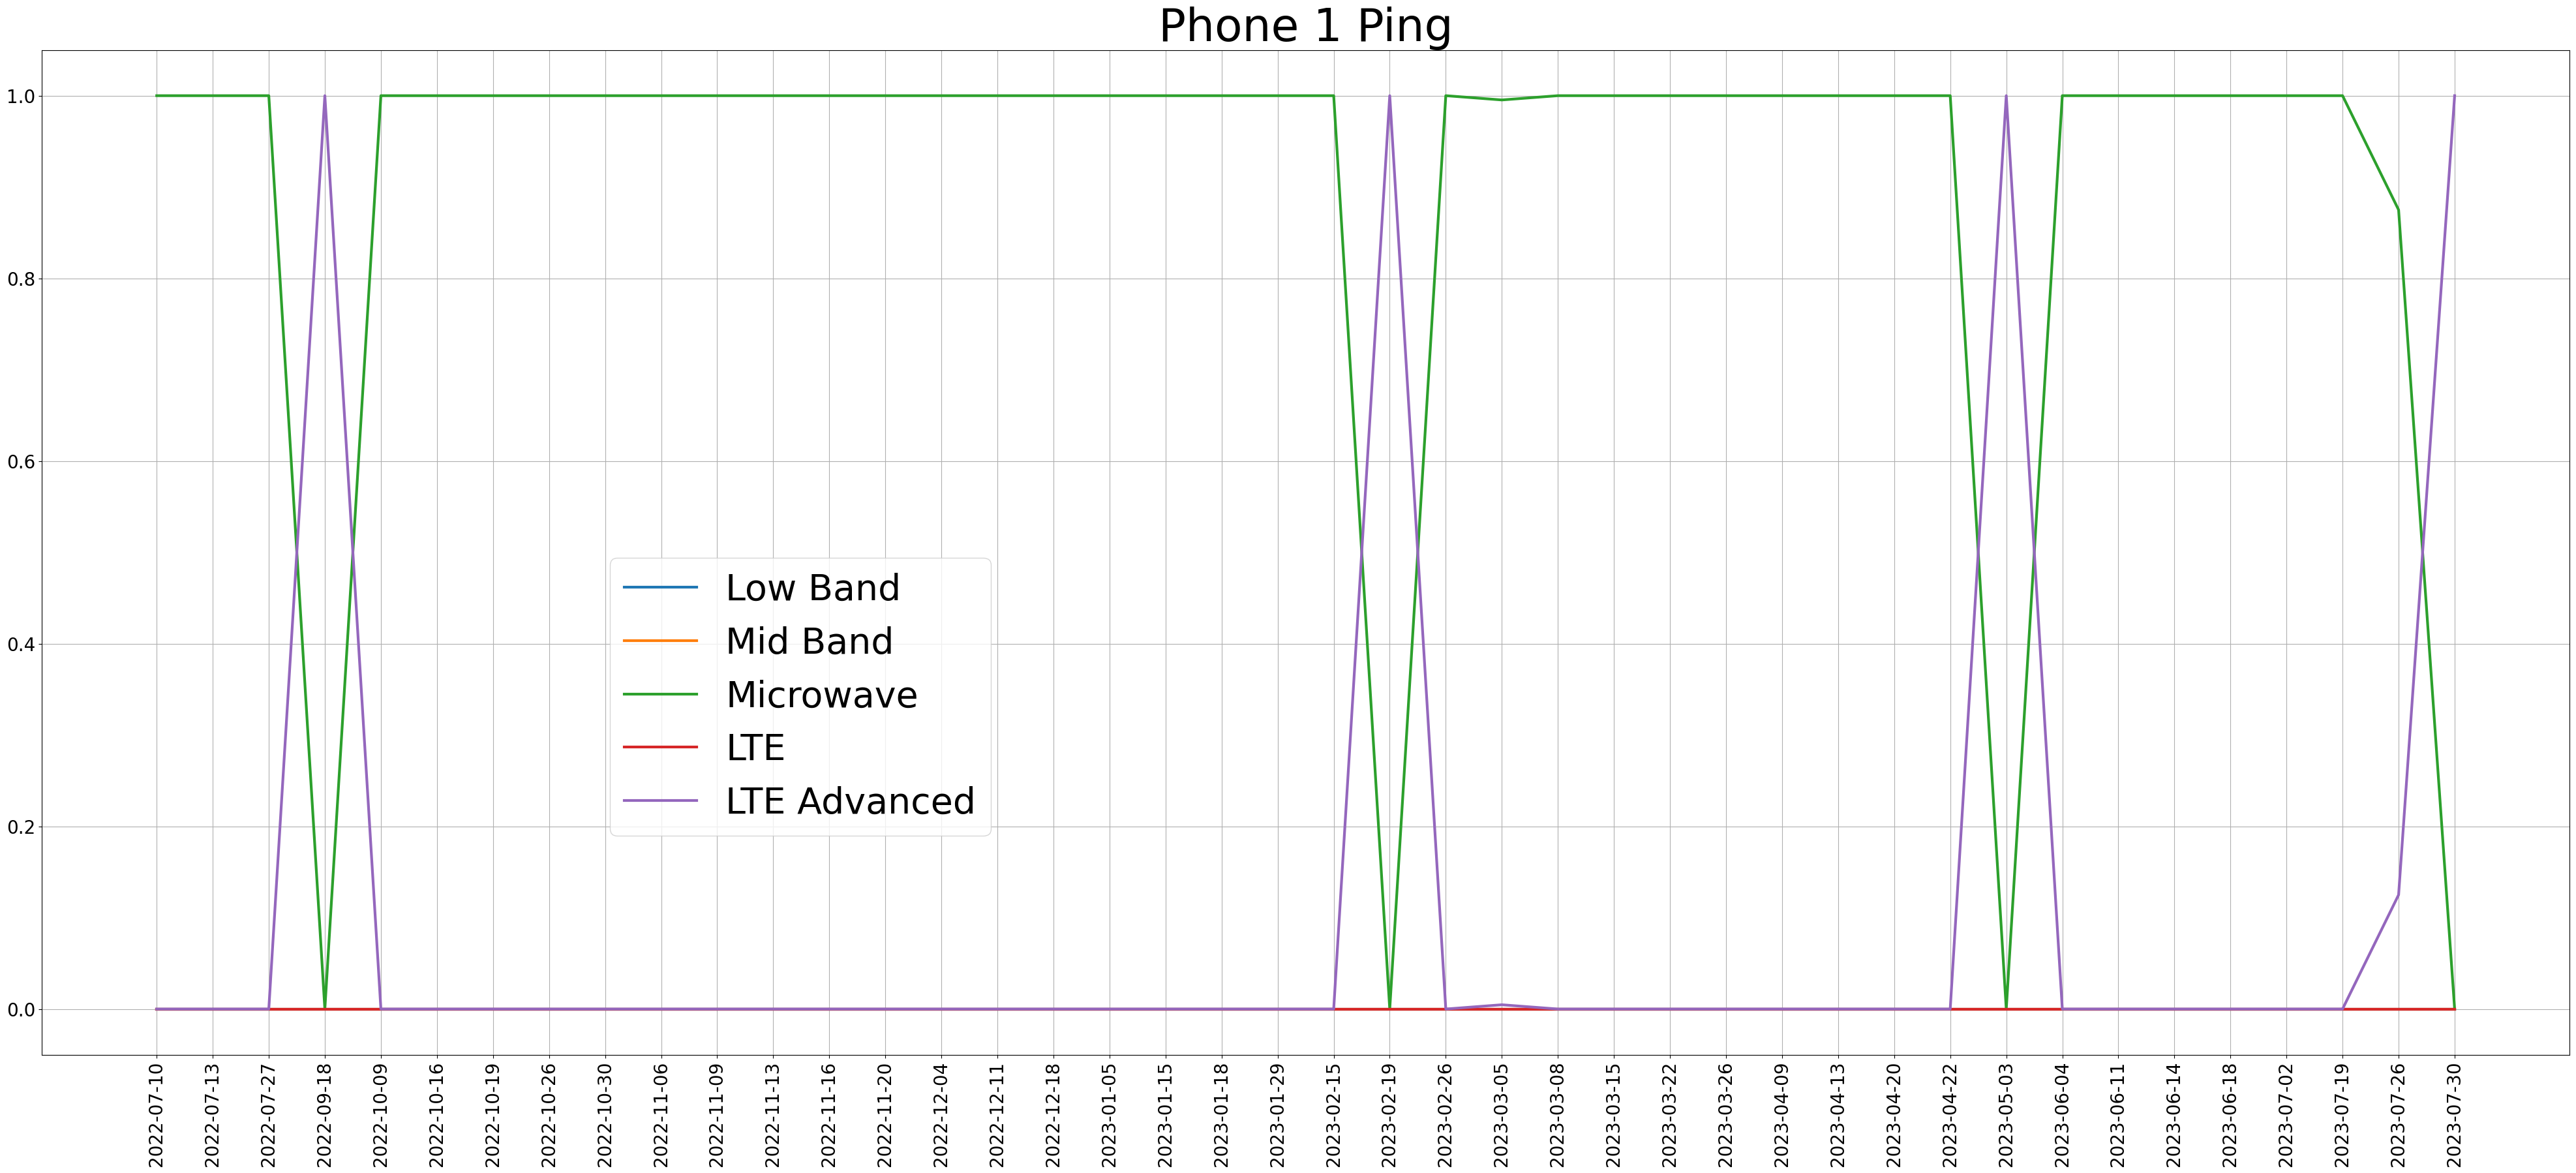

In [114]:
GenerateGraph("Phone1PingMobility.csv", "Phone 1 Ping")